Code to bin and then train models on specific bins of data.  

** N.B. Investigation was done prior to data imputing scheme

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble


In [78]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))


In [79]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [80]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

county
state
electricity_price_transportation


In [81]:
df_all = df_all.dropna()

In [246]:
df = df_all

In [247]:
df['median_income_per_area_residential'] = df['median_household_income'].div(df.land_area)
df['income_per_area_residential'] = df['average_household_income']*df['household_count'].div(df.land_area)
df['household_density'] = df['household_count'].div(df.land_area)
df['education_higher_ed_rate'] = (df['education_bachelor'] + df['education_doctoral'] + df['education_master'] + df['education_professional_school']).div(df.education_population)

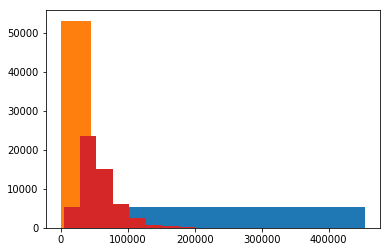

In [248]:
x = 10
n, bins_equl_n, patches = plt.hist(df.population_density, histedges_equalN(df.population_density, 10))
df['population_density_bin_equaln'] = pd.cut(df['population_density'],bins_equl_n, labels = [str(n) for n in range(len(bins_equl_n)-1)])

x = 10
n, bins_equl_width, patches = plt.hist(df.population_density, 10)
df['population_density_bin_equalwidth'] = pd.cut(df['population_density'],bins_equl_width)

n, bins, patches = plt.hist(df['mortgage_with_rate'],5)
df['mortgage_with_rate_bin'] = pd.cut(df['mortgage_with_rate'],bins, labels = [n for n in range(len(bins)-1)])

df['incentive_residential_state_level_bin'] = pd.cut(df['incentive_residential_state_level'],[0,5,8,15,18])
df['daily_solar_radiation_bin'] = pd.cut(df['daily_solar_radiation'],[0,4,5,7], labels = [n for n in range(len([0,4,5,7])-1)])

n, bins, patches = plt.hist(df['median_household_income'],10)
df['median_household_income_bin'] = pd.cut(df['median_household_income'],bins, labels = [n for n in range(len(bins)-1)])

df['age_retired']= df.population*df.age_65_74_rate + df.population*df.age_75_84_rate + df.population*df.age_more_than_85_rate 
df['age_retired_rate'] = df['age_retired'].div(df.population)

In [325]:
target = 'solar_system_count_residential'#'total_panel_area'

binned_var_omit = [col for col in df.columns if '_bin' in col and col !='daily_solar_radiation_bin']

omit = ['Unnamed: 0','fips','solar_system_count_nonresidential', 'total_panel_area', 'population_density_bin_equalwidth','population_density_bin_equaln','fips', 'county', 'state', 'electricity_price_transportation', 'total_panel_area_residential',
'total_panel_area_nonresidential',  'education_population','solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
        'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 'solar_system_count']

edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white', 'race_indian_alaska_rate','race_two_more_rate']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar', 'heating_fuel_solar_rate']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate','race_indian_alaska','race_two_more']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate', 'heating_fuel_solar']

nonresidential = ['incentive_count_nonresidential','electricity_consume_commercial','electricity_price_overall', 'electricity_consume_industrial', 'electricity_consume_total','electricity_price_industrial','electricity_price_commercial']

regardless_omit = ['water_area', 'lon', 'heating_design_temperature']#['heating_fuel_fuel_oil_kerosene_rate','heating_fuel_fuel_oil_kerosene','race_indian_alaska_rate','race_islander_rate', 'race_indian_alaska','race_islander']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

Theoretically, the data may include groups that behave differently.  On that premise, the below code bins the data based on a couple variables, and trains a linear regression and gradient boosting regression model on each bin. Code two cells down summarizes the results

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 0 lin_reg [ 0.37608424  0.35581991  0.3645039 ]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 0 clf [ 0.66584717  0.65538397  0.63533909]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 1 lin_reg [ 0.50544255  0.47017455  0.52687661]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 1 clf [ 0.72347569  0.68052711  0.72131543]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set 

incentive_residential_state_level_bin 0 lin_reg [ 0.29799836  0.30723321  0.28355722]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 0 clf [ 0.46959752  0.57079385  0.50942001]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 1 lin_reg [ 0.46366866  0.56020621  0.48062858]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 1 clf [ 0.75516033  0.807131    0.73055744]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 2 lin_reg [ 0.37300572  0.39687571  0.35036457]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 2 clf [ 0.64261933  0.61556827  0.52614204]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 3 lin_reg [ 0.57547952  0.54886201  0.58962017]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 3 clf [ 0.74203812  0.70653631  0.73303592]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


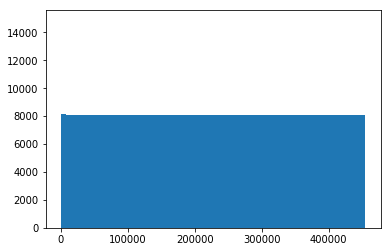

In [235]:
x = 5
n, bins_equl_n, patches = plt.hist(X_train.population_density, histedges_equalN(X_train.population_density, x))
# df['population_density_bin_equaln'] = pd.cut(df['population_density'],bins_equl_n, labels = [str(n) for n in range(len(bins_equl_n)-1)])
n, incentive_bins_equl_n, patches = plt.hist(X_train.incentive_residential_state_level, histedges_equalN(X_train.incentive_residential_state_level, 4))
incentive_bins_equl_n[0]=0
df['incentive_residential_state_level_bin'] = pd.cut(df['incentive_residential_state_level'],incentive_bins_equl_n, labels = [n for n in range(len(incentive_bins_equl_n)-1)])

d= {'daily_solar_radiation_bin':{'feature':'daily_solar_radiation', 'splits':[0,4.5,9], 'labels':[n for n in range(len([0,4,7])-1)]},
'incentive_residential_state_level_bin':{'feature':'incentive_residential_state_level','splits':incentive_bins_equl_n, 'labels':[n for n in range(len(incentive_bins_equl_n)-1)]}}

params = {'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model_results = {}
models = {'lin_reg':linear_model.LinearRegression(), 'clf':ensemble.GradientBoostingRegressor(**params)}
for key in d.keys():
    # split the training and test sets according to bins
    X_train[key] = pd.cut(X_train[d[key]['feature']],d[key]['splits'], labels = d[key]['labels'])
    X_test[key] = pd.cut(X_test[d[key]['feature']],d[key]['splits'], labels = d[key]['labels'])
    model_results[key]={}
    
    # for each bin, train two models and store outputs
    for slce in list(set(X_train[key])):
        binned_var_omit = [col for col in X_train.columns if '_bin' in col]

        X_train_tmp = X_train[X_train[key]==slce]
        y_train_tmp = X_train_tmp[target]
        X_train_tmp = X_train_tmp.loc[:, ~(X_train_tmp.columns).isin([target]+binned_var_omit)]
                                      
        X_test_tmp = X_test[X_test[key]==slce]
        y_test_tmp = X_test_tmp[target]
        X_test_tmp = X_test_tmp.loc[:, ~(X_test_tmp.columns).isin([target]+binned_var_omit)]
        if len(X_train_tmp)>0:
            model_results[key][slce] = {}
            for model_key in models.keys():
                try:
                    model = models[model_key].fit(X_train_tmp, y_train_tmp)
                    model_results[key][slce][model_key]= {'model':model, 'score':model.score(X_test_tmp, y_test_tmp), 'cv':cross_val_score(model,X_train_tmp, y_train_tmp), 
                                      'y_pred': model.predict(X_test_tmp), 'y_test':y_test_tmp }
                    print(key,slce,model_key, model_results[key][slce][model_key]['cv'])
                except:
                    continue
    y_train_tmp = X_train[target]
    X_train_tmp = X_train.loc[:, ~(X_train.columns).isin([target]+binned_var_omit)]
    y_test_tmp = X_test[target]
    X_test_tmp = X_test.loc[:, ~(X_test.columns).isin([target]+binned_var_omit)]
    model_results[key]['all'] = {}
    
    # train and test model on full train/test data sets (no bins) for comparison
    for model_key in models.keys():
        model = models[model_key].fit(X_train_tmp, y_train_tmp)
        model_results[key]['all'][model_key]= {'model':model, 'score':model.score(X_test_tmp, y_test_tmp), 'cv':cross_val_score(model,X_train_tmp, y_train_tmp), 
                                      'y_pred': model.predict(X_test_tmp), 'y_test':y_test_tmp }

        


In [236]:
# Summarizing scores per model and cumulative error for model sets
from sklearn.metrics import mean_squared_error

for model in models.keys():
    for cat in model_results.keys():
        y_preds = []
        y_tests = []
        for bn in model_results[cat]:
            if bn != 'all':
                print(cat, bn, model, model_results[cat][bn][model]['score'])
                y_preds = y_preds + model_results[cat][bn][model]['y_pred'].tolist()
                y_tests = y_tests + model_results[cat][bn][model]['y_test'].tolist()
        mse = mean_squared_error(y_tests, y_preds)
        mse_all = mean_squared_error(model_results[cat]['all'][model]['y_test'], model_results[cat]['all'][model]['y_pred'])
        print("MSE: %.4f" % mse)
        print("MSE: %.4f" % mse_all)

daily_solar_radiation_bin 0 lin_reg 0.368866844216
daily_solar_radiation_bin 1 lin_reg 0.488322744142
MSE: 1250.8710
MSE: 1639.9171
incentive_residential_state_level_bin 0 lin_reg 0.279397819265
incentive_residential_state_level_bin 1 lin_reg 0.514495259852
incentive_residential_state_level_bin 2 lin_reg 0.333611443228
incentive_residential_state_level_bin 3 lin_reg 0.563433228855
MSE: 1159.4881
MSE: 1639.9171
daily_solar_radiation_bin 0 clf 0.696266870669
daily_solar_radiation_bin 1 clf 0.702734202855
MSE: 716.5006
MSE: 779.4780
incentive_residential_state_level_bin 0 clf 0.474014216365
incentive_residential_state_level_bin 1 clf 0.80770829021
incentive_residential_state_level_bin 2 clf 0.469936281826
incentive_residential_state_level_bin 3 clf 0.716698355297
MSE: 775.1136
MSE: 777.0925
